# **ANALISIS LAGU TOP GLOBAL BERDASARKAN FITUR MUSIK DI SPOTIFY**

## Projek UAS Data Maining 1

ANGGOTA :


* Viky Dwi Thaniya	(164221030)
* Najla Dhia Rusydi			(164221043)
* Nazhifah Firyal Jasmine		(164221083)
* Farah					(164221099)
* Aysha Milarta Shafiyalina		(164221122)


## **LINK DATA: [Topsongs2024](https://docs.google.com/spreadsheets/d/1aPhD7P8-23RAgBeqmhufDlze3KkaoGkMeNnbcLphyGA/edit?usp=sharing)**

# **Import Library**

In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy.stats import randint
import graphviz
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.target import FeatureCorrelation
import plotly.express as px
from sklearn import linear_model, preprocessing
from sklearn.manifold import TSNE
from matplotlib import rcParams
from kneed import KneeLocator
from sklearn.cluster import KMeans, DBSCAN
from matplotlib.patches import Ellipse
from math import pi, ceil
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import ConvexHull

# **Import Data**

Sebelumnya data sudah di scrapping : https://colab.research.google.com/drive/1mNuyAfNlMHMPDaWwJGks9dmdjn1iOlaG?usp=sharing

In [ ]:
df = pd.read_csv('topsongs2024.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,genres,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2qSkIjg1o9h3YT9RAgYN75,Espresso,100,175459,True,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,2024-04-12,pop,0.701,...,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,4
1,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,99,155151,False,Tommy Richman,1WaFQSHVGZQJTbf0BdxdNo,2024-04-26,chill abstract hip hop,0.849,...,1,-5.106,0,0.0436,0.0982,0.000215,0.0680,0.927,138.003,4
2,629DixmZGHc7ILtEntuiWE,LUNCH,96,179586,False,Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH,2024-05-17,"pop, art pop",0.893,...,11,-7.981,0,0.0643,0.0452,0.082300,0.0632,0.945,124.987,4
3,5Z0UnEtpLDQyYlWwgi8m9C,Too Sweet,90,251424,False,Hozier,2FXC3k01G6Gw61bmprjgqS,2024-03-22,"pov: indie, irish singer-songwriter, modern rock",0.741,...,10,-5.505,1,0.0412,0.0295,0.000809,0.0398,0.934,117.038,4
4,2OzhQlSqBEmt7hmkYxfT6m,Fortnight (feat. Post Malone),95,228965,False,"Taylor Swift, Post Malone","06HL4z0CvFAxyc27GXpf02, 246dkjvS1zLTtiykXe5h60",2024-04-18,"rap, pop, melodic rap, dfw rap",0.504,...,11,-10.976,1,0.0308,0.5020,0.000015,0.0961,0.281,192.004,4


# **Data Cleaning**

## Menghapus Kolom yang Tidak Diperlukan

In [ ]:
df = df.drop(columns=["id", "id_artists"])
df.head()

,name,popularity,duration_ms,explicit,artists,release_date,genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Espresso,100,175459,True,Sabrina Carpenter,2024-04-12,pop,0.701,0.760,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,4
1,MILLION DOLLAR BABY,99,155151,False,Tommy Richman,2024-04-26,chill abstract hip hop,0.849,0.699,1,-5.106,0,0.0436,0.0982,0.000215,0.0680,0.927,138.003,4
2,LUNCH,96,179586,False,Billie Eilish,2024-05-17,"pop, art pop",0.893,0.400,11,-7.981,0,0.0643,0.0452,0.082300,0.0632,0.945,124.987,4
3,Too Sweet,90,251424,False,Hozier,2024-03-22,"pov: indie, irish singer-songwriter, modern rock",0.741,0.620,10,-5.505,1,0.0412,0.0295,0.000809,0.0398,0.934,117.038,4
4,Fortnight (feat. Post Malone),95,228965,False,"Taylor Swift, Post Malone",2024-04-18,"rap, pop, melodic rap, dfw rap",0.504,0.386,11,-10.976,1,0.0308,0.5020,0.000015,0.0961,0.281,192.004,4


In [ ]:
df.info() # Summary data setelah penghapusan kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              249 non-null    object 
 1   popularity        249 non-null    int64  
 2   duration_ms       249 non-null    int64  
 3   explicit          249 non-null    bool   
 4   artists           249 non-null    object 
 5   release_date      249 non-null    object 
 6   genres            208 non-null    object 
 7   danceability      249 non-null    float64
 8   energy            249 non-null    float64
 9   key               249 non-null    int64  
 10  loudness          249 non-null    float64
 11  mode              249 non-null    int64  
 12  speechiness       249 non-null    float64
 13  acousticness      249 non-null    float64
 14  instrumentalness  249 non-null    float64
 15  liveness          249 non-null    float64
 16  valence           249 non-null    float64
 1

## Imputasi Missing Value

In [ ]:
df.isnull().sum() # mengecek missing value

name                 0
popularity           0
duration_ms          0
explicit             0
artists              0
release_date         0
genres              41
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [ ]:
# Splitting data
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df_train = df.dropna(subset=['genres'])  # Dataset dengan genre yang diketahui
df_predict = df[df['genres'].isnull()]  # Dataset dengan genre yang tidak diketahui

X_train = df_train[features] # semua fitur selain genre sebagai variabel x train
y_train = df_train['genres'] # fitur genre sebagai variabel y train
X_predict = df_predict[features] # semua fitur selain genre pada data dengan nilai genre yang hilang sebagai variabel x predict

# Melatih model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Memprediksi genre yang hilang
predicted_genres = model.predict(X_predict)
df.loc[df['genres'].isnull(), 'genres'] = predicted_genres

In [ ]:
df.isnull().sum() # mengecek ulang missing value

name                0
popularity          0
duration_ms         0
explicit            0
artists             0
release_date        0
genres              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

## Menyederhanakan Kolom Genre

In [ ]:
unique_genres = df['genres'].unique() # Mendapatkan semua jenis genre pada data

# Fungsi untuk memperpendek nama genre
def shorten_genre(genre):
    words = genre.split(', ') # Genre dipisah berdasarkan tanda koma
    if len(words) > 1:
        shortened_genre = words[0][:20]
        if len(words) > 2:
            shortened_genre += ''
    else:
        shortened_genre = words[0]
    return shortened_genre

shortened_genres = pd.Series([shorten_genre(genre) for genre in unique_genres], index=unique_genres)

df['general_genre'] = df['genres'].apply(lambda x: shortened_genres[x])
df.drop(columns=['genres'], inplace=True)
df.rename(columns={'general_genre': 'genres'}, inplace=True)

In [ ]:
df.head()

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
0,Espresso,100,175459,True,Sabrina Carpenter,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,4,pop
1,MILLION DOLLAR BABY,99,155151,False,Tommy Richman,2024-04-26,0.849,0.699,1,-5.106,0,0.0436,0.0982,0.000215,0.0680,0.927,138.003,4,chill abstract hip hop
2,LUNCH,96,179586,False,Billie Eilish,2024-05-17,0.893,0.400,11,-7.981,0,0.0643,0.0452,0.082300,0.0632,0.945,124.987,4,pop
3,Too Sweet,90,251424,False,Hozier,2024-03-22,0.741,0.620,10,-5.505,1,0.0412,0.0295,0.000809,0.0398,0.934,117.038,4,pov: indie
4,Fortnight (feat. Post Malone),95,228965,False,"Taylor Swift, Post Malone",2024-04-18,0.504,0.386,11,-10.976,1,0.0308,0.5020,0.000015,0.0961,0.281,192.004,4,rap


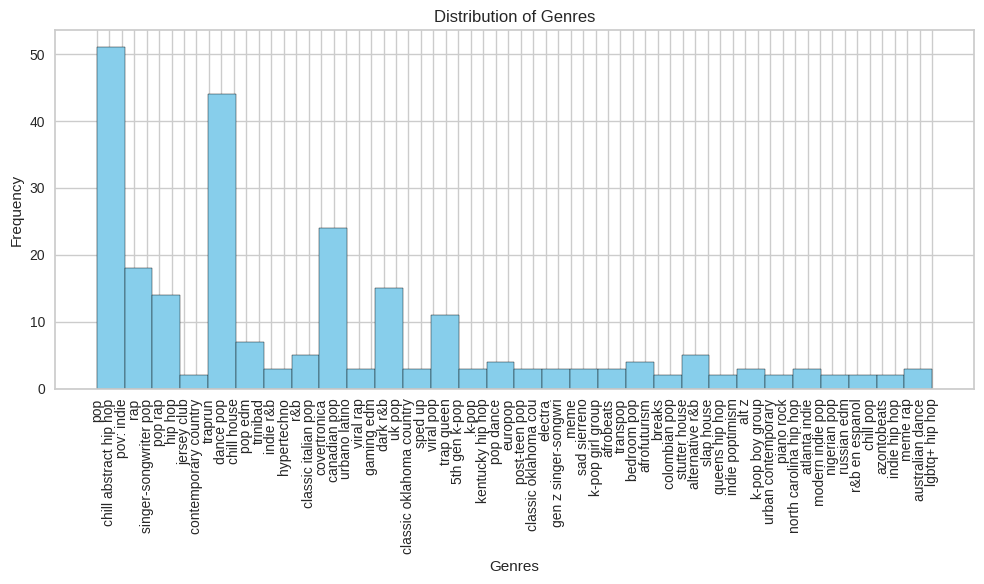

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['genres'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
def narrow_genre(genre):
    if 'pop' in genre:
        return 'Pop'
    elif 'hip hop' in genre or 'rap' in genre:
        return 'Hip Hop/Rap'
    elif 'r&b' in genre:
        return 'R&B'
    elif 'country' in genre:
        return 'Country'
    elif 'reggae' in genre:
        return 'Reggae'
    elif 'latin' in genre:
        return 'Latin'
    elif 'afrobeats' in genre:
        return 'Afrobeats'
    elif 'alternative' in genre:
        return 'Alternative'
    elif 'indie' in genre:
        return 'Indie'
    elif 'electronic' in genre:
        return 'Electronic'
    elif 'rock' in genre:
        return 'Rock'
    elif 'k-pop' in genre:
        return 'K-Pop'
    else:
        return genre

# Terapkan fungsi untuk mempersempit genre ke DataFrame
df['genres'] = df['genres'].apply(narrow_genre)
df.head()

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
0,Espresso,100,175459,True,Sabrina Carpenter,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,4,Pop
1,MILLION DOLLAR BABY,99,155151,False,Tommy Richman,2024-04-26,0.849,0.699,1,-5.106,0,0.0436,0.0982,0.000215,0.0680,0.927,138.003,4,Hip Hop/Rap
2,LUNCH,96,179586,False,Billie Eilish,2024-05-17,0.893,0.400,11,-7.981,0,0.0643,0.0452,0.082300,0.0632,0.945,124.987,4,Pop
3,Too Sweet,90,251424,False,Hozier,2024-03-22,0.741,0.620,10,-5.505,1,0.0412,0.0295,0.000809,0.0398,0.934,117.038,4,Indie
4,Fortnight (feat. Post Malone),95,228965,False,"Taylor Swift, Post Malone",2024-04-18,0.504,0.386,11,-10.976,1,0.0308,0.5020,0.000015,0.0961,0.281,192.004,4,Hip Hop/Rap


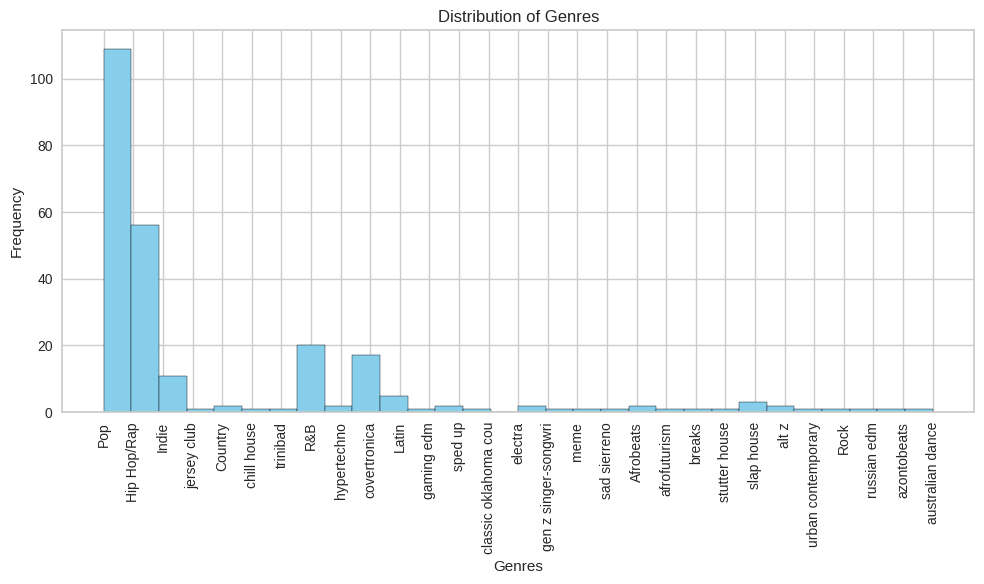

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['genres'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Exploratory Data Analysis (EDA)**

Fitur-fitur musik yang ada pada data yaitu:

- **artist**: Nama artis.
- **name**: Nama lagu.
- **duration_ms**: Durasi lagu dalam milidetik.
- **explicit**: Indikasi apakah lagu memiliki konten eksplisit.
- **release_date**: Tahun rilis lagu.
- **popularity**: Tingkat popularitas lagu (0-100).
- **danceability**: Seberapa cocok lagu untuk menari (0.0-1.0).
- **energy**: Tingkat intensitas dan aktivitas lagu (0.0-1.0).
- **key**: Kunci musik lagu.
- **loudness**: Kerasnya lagu dalam desibel (dB).
- **mode**: Modus lagu (1=mayor, 0=minor).
- **speechiness**: Tingkat kehadiran kata-kata yang diucapkan (0.0-1.0).
- **acousticness**: Kepercayaan apakah lagu akustik (0.0-1.0).
- **instrumentalness**: Kemungkinan lagu tidak mengandung vokal (0.0-1.0).
- **liveness**: Kemungkinan lagu direkam live (0.0-1.0).
- **valence**: Kepositifan musik lagu (0.0-1.0).
- **tempo**: Kecepatan lagu dalam ketukan per menit (BPM).
- **genre**: Genre lagu.
- **time_signature**: Jumlah ketukan dalam setiap bar lagu.

## Korelasi antara feature dengan popularity

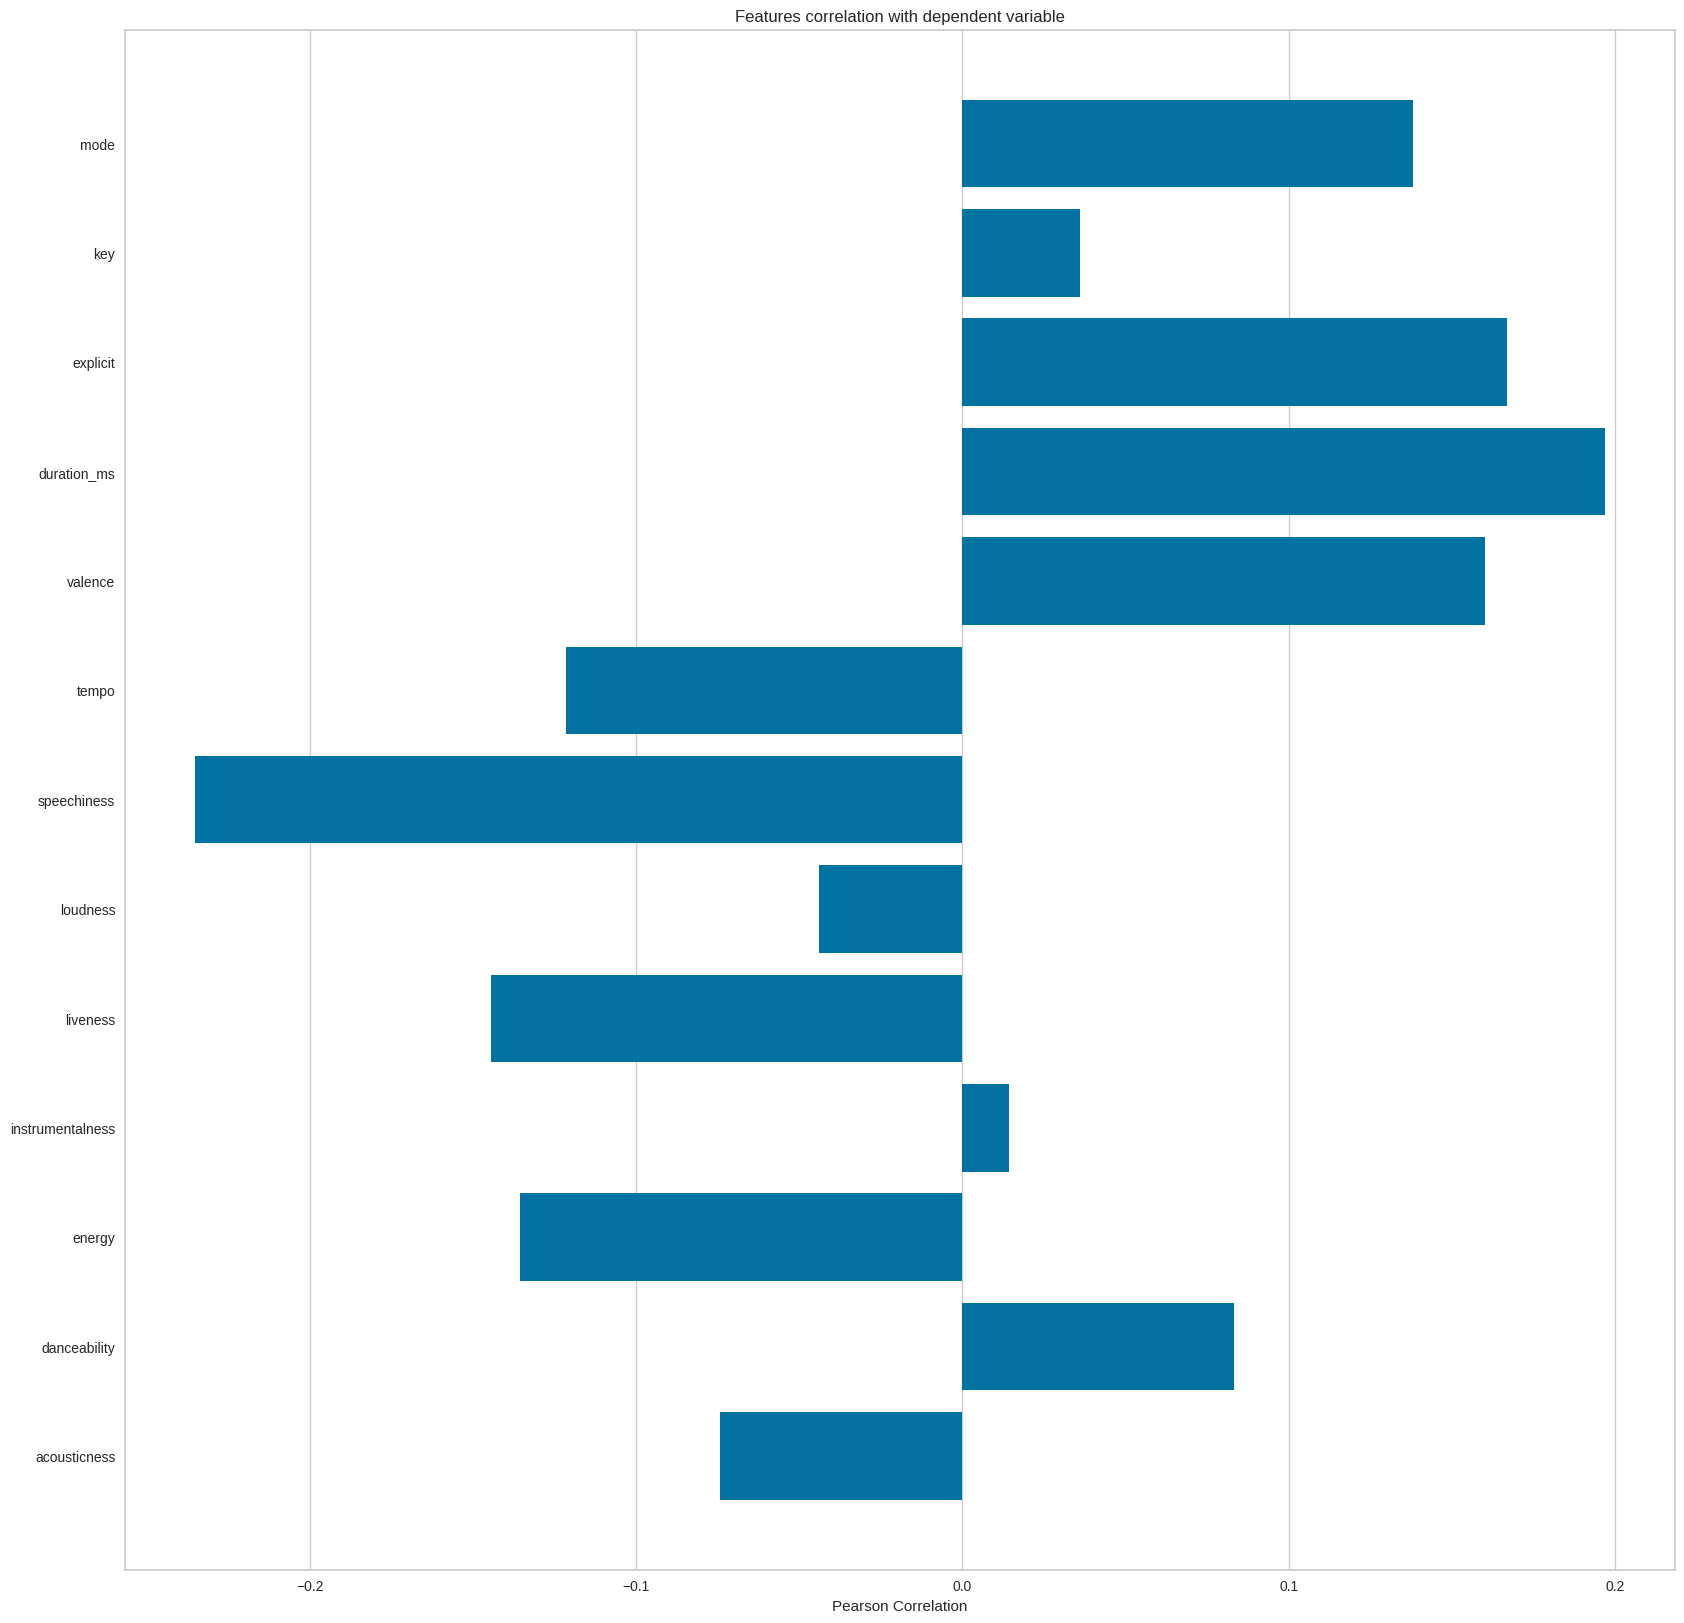

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode']

X, y = df[feature_names], df['popularity']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)
visualizer.show()

## Top 10 Genre

In [ ]:
top10_genres = df.groupby('genres').agg({'valence': 'mean', 'energy': 'mean', 'danceability': 'mean', 'acousticness': 'mean', 'popularity': 'mean'}).nlargest(10, 'popularity')
top10_genres.reset_index(inplace=True)
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title='Top 10 Genres by Popularity and Selected Features')
fig.show()


## Most Prolific Artists

In [ ]:
top_artist = (df['artists'].value_counts()
              .reset_index(name='count')
              .rename(columns={'index': 'Artist'})
              .head(10)
             )

fig = px.bar(top_artist, y='artists', x='count', title='Most Prolific Artists')
fig.show()


In [ ]:
artists_grp = df.groupby(['artists'])
Top20artists = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]

fig = px.bar(Top20artists, y=Top20artists.index, x='popularity', orientation='h', color='popularity',
             labels={'popularity': 'Popularity', 'index': 'Artists'},
             title='Artists Popularity')

fig.update_layout(width=800, height=600)

fig.show()


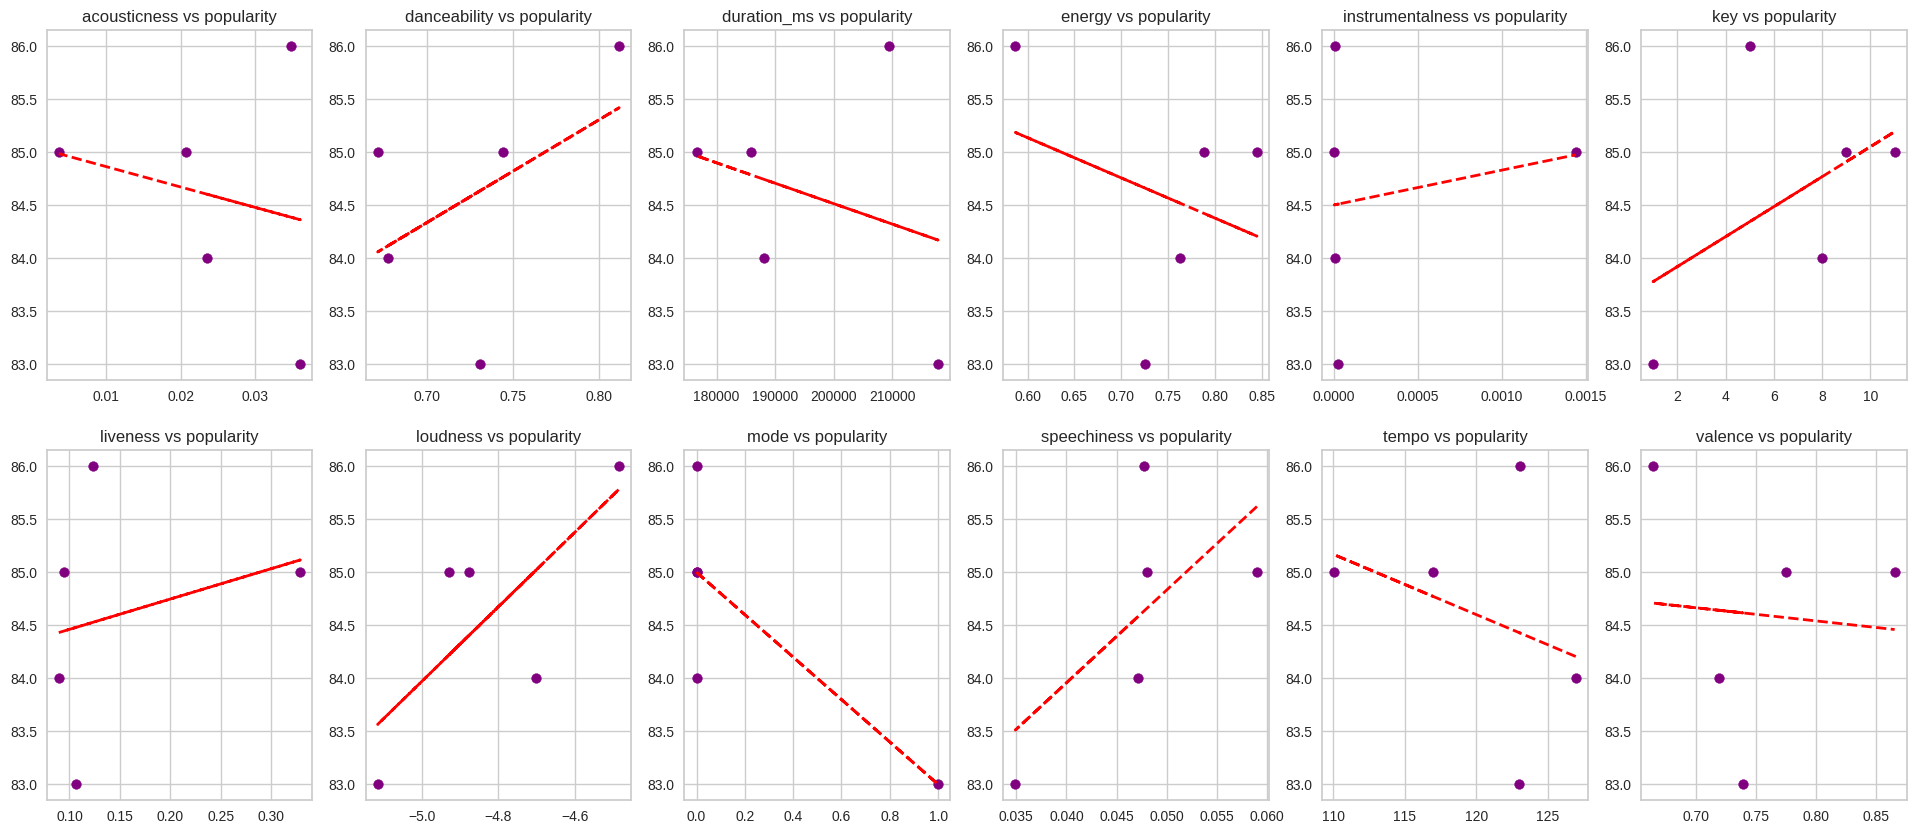

In [ ]:
DL = df[df['artists'] == 'Dua Lipa']

plt.figure(0, figsize=(24,10))
x_axis = ['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness',
          'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']
z = 0
for i in range(2):
    for j in range(6):
        x = DL[x_axis[z]].values.reshape(-1,1)
        y = DL["popularity"].values.reshape(-1,1)
        regr = linear_model.LinearRegression()
        regr.fit(x, y)
        ax = plt.subplot2grid((2,6), (i,j))
        ax.scatter(x,y, c='purple')
        ax.plot(x, regr.predict(x), color="red", linewidth=2, linestyle='--')
        ax.title.set_text(f'{x_axis[z]} vs popularity')
        z += 1
plt.show()


In [ ]:
df['explicit'] = (df['explicit'] == True) * 1

# **One Hot Encoding**

In [ ]:
df1= df.copy()
df1.head()

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
0,Espresso,100,175459,1,Sabrina Carpenter,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,4,Pop
1,MILLION DOLLAR BABY,99,155151,0,Tommy Richman,2024-04-26,0.849,0.699,1,-5.106,0,0.0436,0.0982,0.000215,0.0680,0.927,138.003,4,Hip Hop/Rap
2,LUNCH,96,179586,0,Billie Eilish,2024-05-17,0.893,0.400,11,-7.981,0,0.0643,0.0452,0.082300,0.0632,0.945,124.987,4,Pop
3,Too Sweet,90,251424,0,Hozier,2024-03-22,0.741,0.620,10,-5.505,1,0.0412,0.0295,0.000809,0.0398,0.934,117.038,4,Indie
4,Fortnight (feat. Post Malone),95,228965,0,"Taylor Swift, Post Malone",2024-04-18,0.504,0.386,11,-10.976,1,0.0308,0.5020,0.000015,0.0961,0.281,192.004,4,Hip Hop/Rap


In [ ]:
ohe_df = pd.get_dummies(df1['genres'])

ohe_df = ohe_df.astype(int)

df_encoded = pd.concat([df1, ohe_df], axis=1)

df_encoded = df_encoded.drop('genres', axis=1)


In [ ]:
df_encoded.head()

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,...,hypertechno,jersey club,meme,russian edm,sad sierreno,slap house,sped up,stutter house,trinibad,urban contemporary
0,Espresso,100,175459,1,Sabrina Carpenter,2024-04-12,0.701,0.760,0,-5.478,...,0,0,0,0,0,0,0,0,0,0
1,MILLION DOLLAR BABY,99,155151,0,Tommy Richman,2024-04-26,0.849,0.699,1,-5.106,...,0,0,0,0,0,0,0,0,0,0
2,LUNCH,96,179586,0,Billie Eilish,2024-05-17,0.893,0.400,11,-7.981,...,0,0,0,0,0,0,0,0,0,0
3,Too Sweet,90,251424,0,Hozier,2024-03-22,0.741,0.620,10,-5.505,...,0,0,0,0,0,0,0,0,0,0
4,Fortnight (feat. Post Malone),95,228965,0,"Taylor Swift, Post Malone",2024-04-18,0.504,0.386,11,-10.976,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded = df_encoded.drop(['artists', 'name', 'release_date'], axis=1)

df_encoded.head()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,hypertechno,jersey club,meme,russian edm,sad sierreno,slap house,sped up,stutter house,trinibad,urban contemporary
0,100,175459,1,0.701,0.760,0,-5.478,1,0.0285,0.1070,...,0,0,0,0,0,0,0,0,0,0
1,99,155151,0,0.849,0.699,1,-5.106,0,0.0436,0.0982,...,0,0,0,0,0,0,0,0,0,0
2,96,179586,0,0.893,0.400,11,-7.981,0,0.0643,0.0452,...,0,0,0,0,0,0,0,0,0,0
3,90,251424,0,0.741,0.620,10,-5.505,1,0.0412,0.0295,...,0,0,0,0,0,0,0,0,0,0
4,95,228965,0,0.504,0.386,11,-10.976,1,0.0308,0.5020,...,0,0,0,0,0,0,0,0,0,0


# **Standarisasi Data**

In [ ]:
x_scaled = preprocessing.scale(df_encoded)
x_scaled

array([[ 1.4440584 , -0.17237216,  1.63149156, ..., -0.06350006,
        -0.06350006, -0.06350006],
       [ 1.40392328, -0.66423489, -0.61293606, ..., -0.06350006,
        -0.06350006, -0.06350006],
       [ 1.28351792, -0.07241561, -0.61293606, ..., -0.06350006,
        -0.06350006, -0.06350006],
       ...,
       [-1.76675121, -0.1072684 ,  1.63149156, ..., -0.06350006,
        -0.06350006, -0.06350006],
       [-2.56945362,  0.61221527, -0.61293606, ..., -0.06350006,
        -0.06350006, -0.06350006],
       [ 0.80189648, -0.24098783,  1.63149156, ..., -0.06350006,
        -0.06350006, -0.06350006]])

# **Dimensional Reduction**

In [ ]:
tsne_data = TSNE(learning_rate=100, random_state = 42).fit_transform(x_scaled)
tsne_data

array([[ -1.373085  ,   5.041388  ],
       [-12.80499   ,  -1.6883692 ],
       [ 10.889924  ,   3.242417  ],
       [  5.6227818 ,  16.801903  ],
       [ -5.3721886 ,  -7.4928203 ],
       [  3.6678493 ,  -8.654807  ],
       [  5.057365  ,  -9.350217  ],
       [ -0.10614488,   4.6860046 ],
       [  2.6249218 ,   5.634184  ],
       [-11.207156  ,   4.466677  ],
       [-16.37753   ,   1.8789289 ],
       [  9.377948  ,  10.646818  ],
       [-13.204703  ,  -5.97913   ],
       [ -1.5919683 ,   5.604152  ],
       [  3.4467995 ,   3.7373092 ],
       [  6.7653594 ,   0.99558693],
       [ 11.074674  ,  -1.2098565 ],
       [  5.6695786 ,  16.716248  ],
       [  4.5107737 ,   2.3837445 ],
       [ -2.448577  ,   5.4381304 ],
       [  5.4139237 ,  -7.473667  ],
       [  5.1011214 ,  17.467024  ],
       [ -2.349743  ,   7.238076  ],
       [-12.513593  ,   2.2836134 ],
       [ -7.8089595 ,  -3.15052   ],
       [  9.077087  ,  -1.0650047 ],
       [  4.582006  ,  17.149801  ],
 

## Visualisasi Scatter Plot

<Axes: >

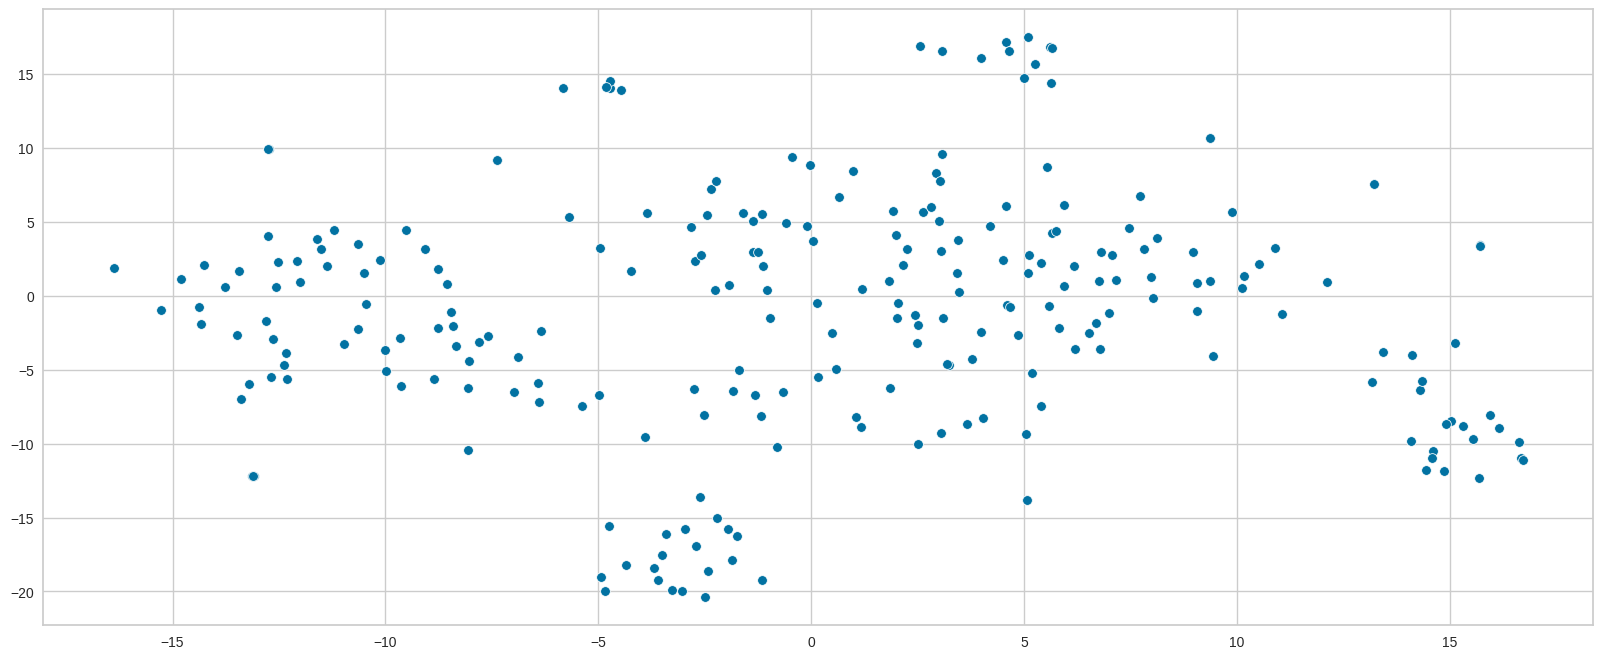

In [ ]:
rcParams['figure.figsize'] = 20,8
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1])


# **K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

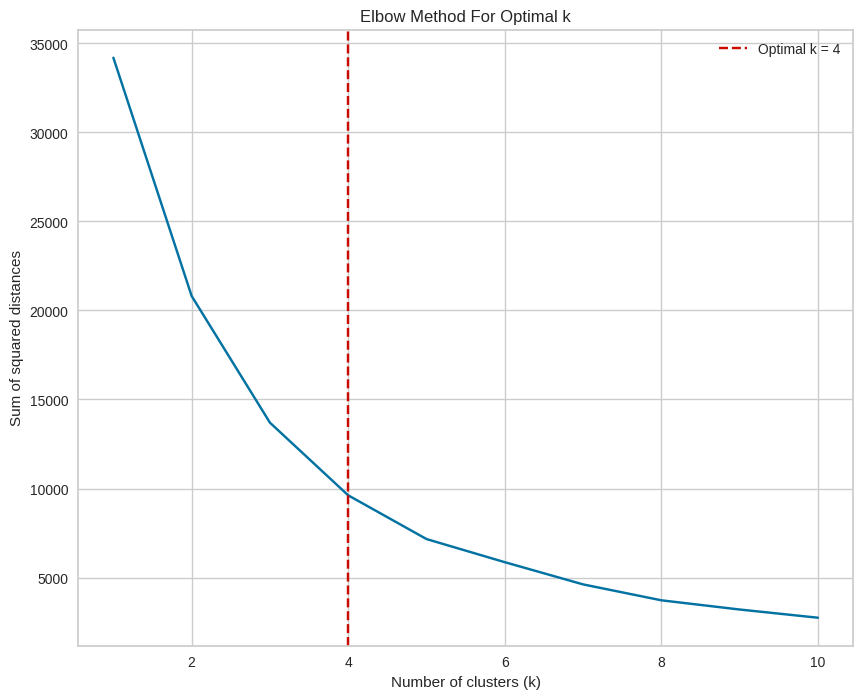

In [ ]:
ss_dist = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state=123)
    km = km.fit(tsne_data)
    ss_dist.append(km.inertia_)

kneedle = KneeLocator(K, ss_dist, S=1.0, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

plt.figure(figsize=(10, 8))
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-29-4508601f40e3>:21: MatplotlibDeprecationWarning:

Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



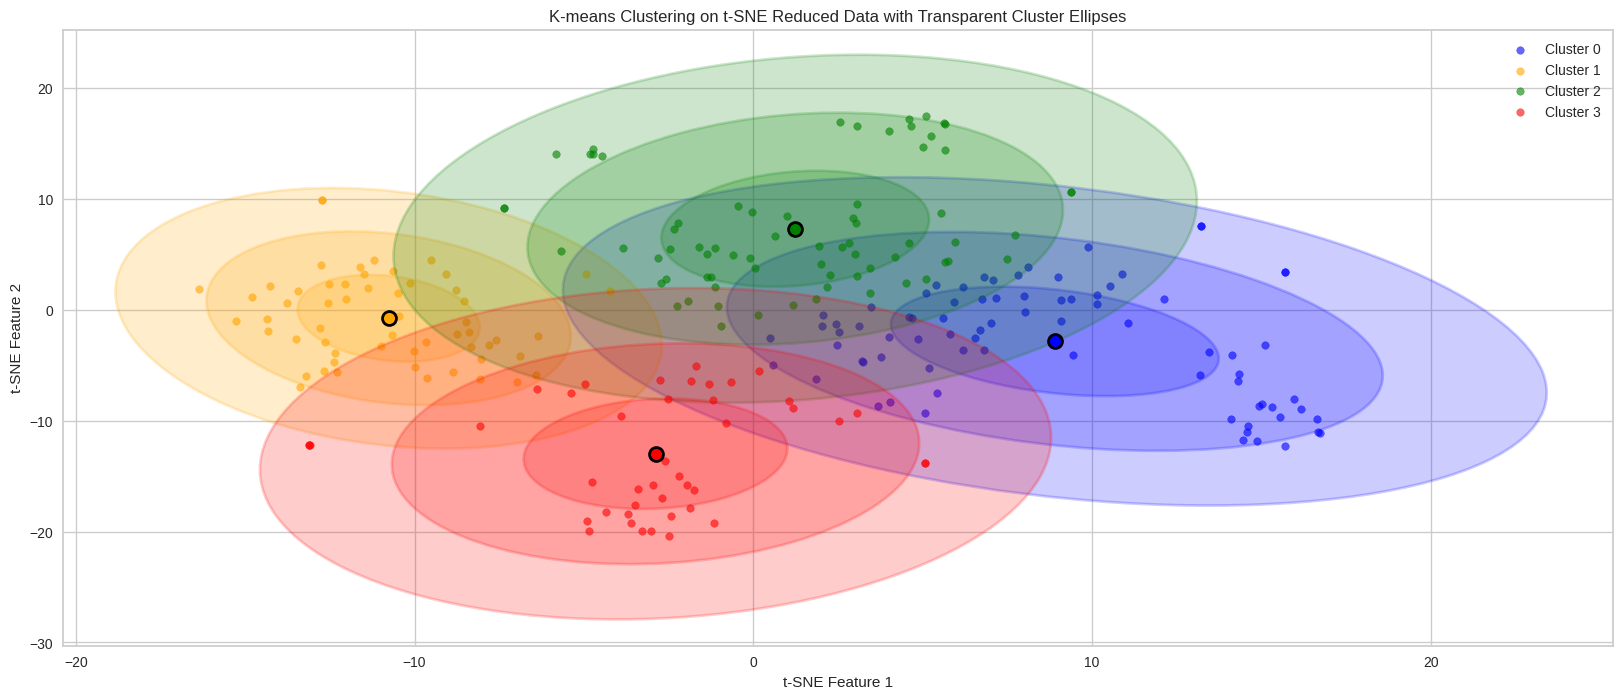

In [ ]:
df_encoded1 = df_encoded.copy()

kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded1['cluster'] = kmeans.fit_predict(tsne_data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20, 8))

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
for i in range(optimal_k):
    points = tsne_data[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=f'Cluster {i}', alpha=0.6)
    centroid = centroids[i]
    cov_matrix = np.cov(points.T)
    draw_ellipse(centroid, cov_matrix, edgecolor=colors[i], alpha=0.2, facecolor=colors[i], linewidth=2)
    plt.plot(centroid[0], centroid[1], marker='o', markersize=10, markerfacecolor=colors[i], markeredgewidth=2, markeredgecolor='black')



plt.title('K-means Clustering on t-SNE Reduced Data with Transparent Cluster Ellipses')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

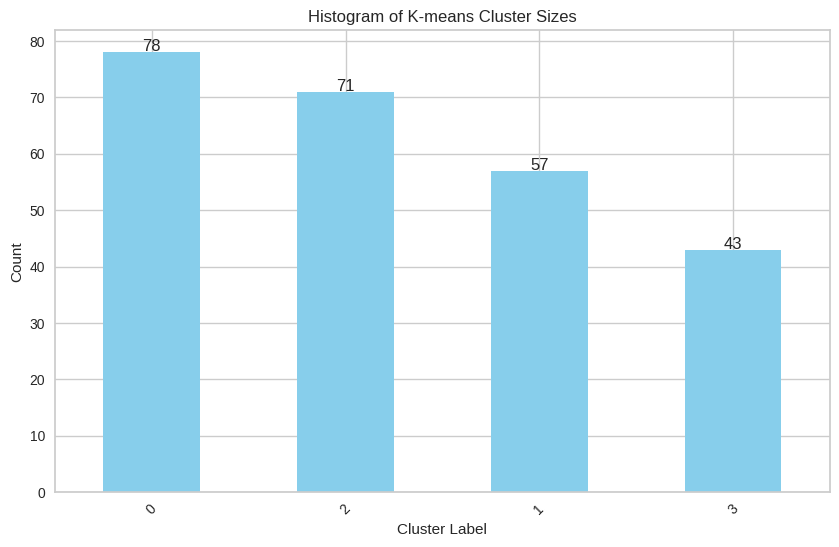

In [ ]:
cluster_counts = df_encoded1['cluster'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of K-means Cluster Sizes')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(cluster_counts):
    plt.text(i, count + 0.2, str(count), ha='center')

plt.show()


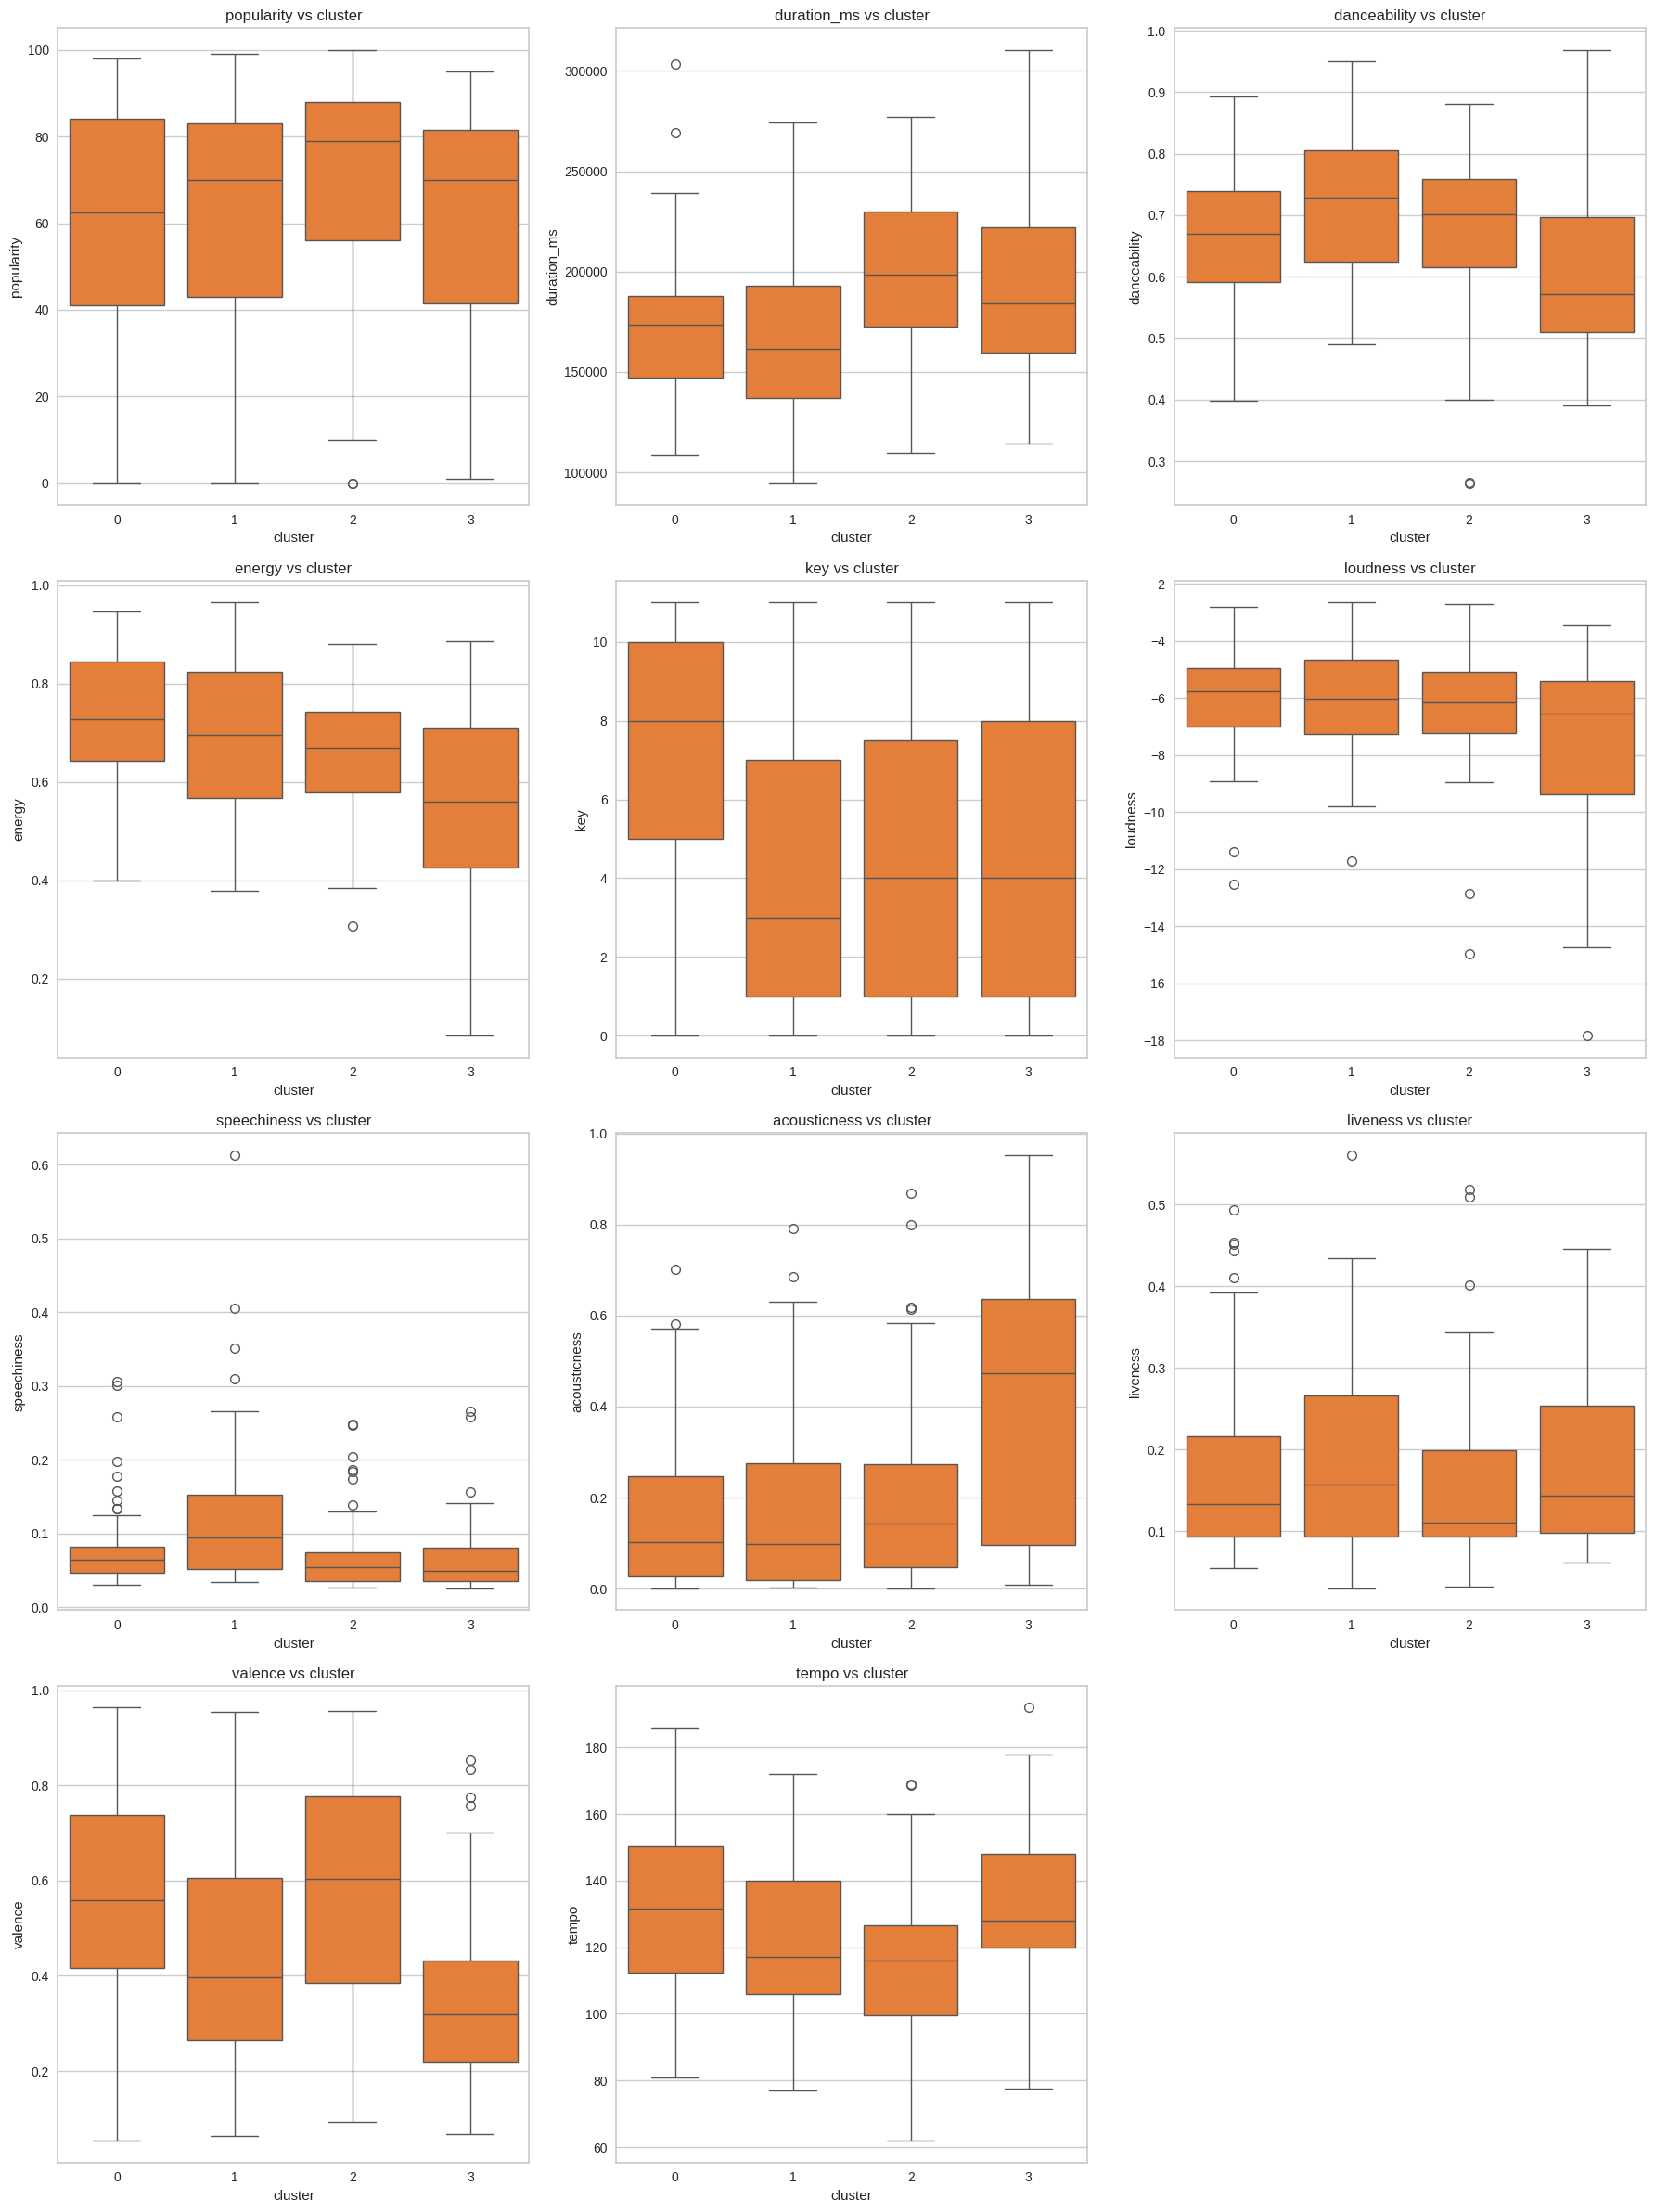

In [ ]:
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy',
                      'key', 'loudness', 'speechiness', 'acousticness',  'liveness', 'valence', 'tempo']
num_features = len(numerical_features)
rows = (num_features + 2) // 3

fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))

axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    sns.boxplot(x='cluster', y=feature, data=df_encoded1, ax=axes[idx], color='#FF781F')
    axes[idx].set_title(f'{feature} vs cluster')

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


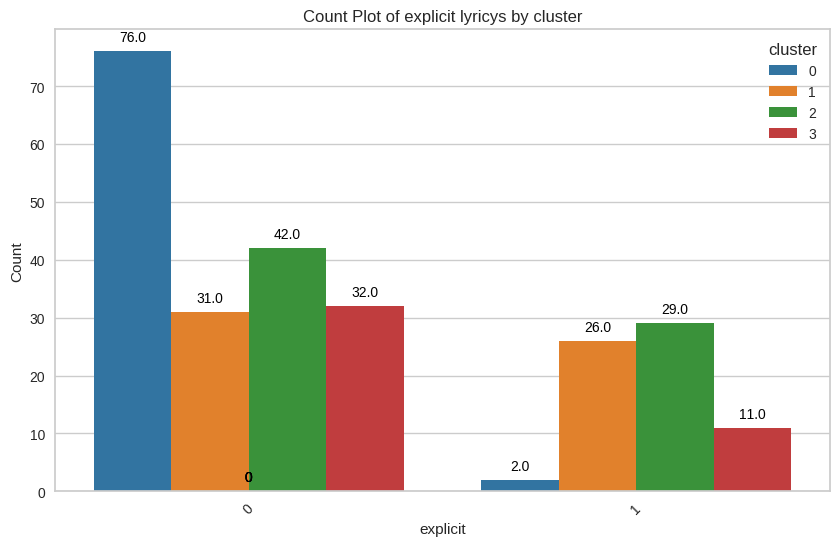

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_encoded1, x="explicit", hue="cluster", palette="tab10")
plt.title(f'Count Plot of explicit lyricys by cluster')
plt.xlabel("explicit")
plt.ylabel('Count')
plt.legend(title="cluster", loc='upper right')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

In [ ]:
df_radar = df
df_radar = df_radar.drop(columns=["artists","release_date","name", "explicit", "key", "mode", "time_signature", "genres"])

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_radar)
df_radar= pd.DataFrame(scaled_data, columns=df_radar.columns)


df_radar_kmean = pd.concat([df_radar, df_encoded1['cluster']], axis=1)
df_radar_kmean = df_radar_kmean.groupby('cluster').mean().reset_index()
df_radar_kmean

,cluster,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0.616795,0.363583,0.556192,0.729998,0.777336,0.090300,0.163533,0.071000,0.267486,0.557561,0.542724
1,1,0.639298,0.343057,0.645440,0.691877,0.772951,0.173913,0.183272,0.018068,0.299345,0.436116,0.466022
2,2,0.690563,0.485314,0.577525,0.649726,0.761542,0.073450,0.207513,0.013057,0.240306,0.561942,0.392397
3,3,0.600698,0.444713,0.483655,0.531162,0.671556,0.073191,0.436876,0.004986,0.287303,0.341563,0.534425


<ipython-input-34-f24cab1d6d8a>:29: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



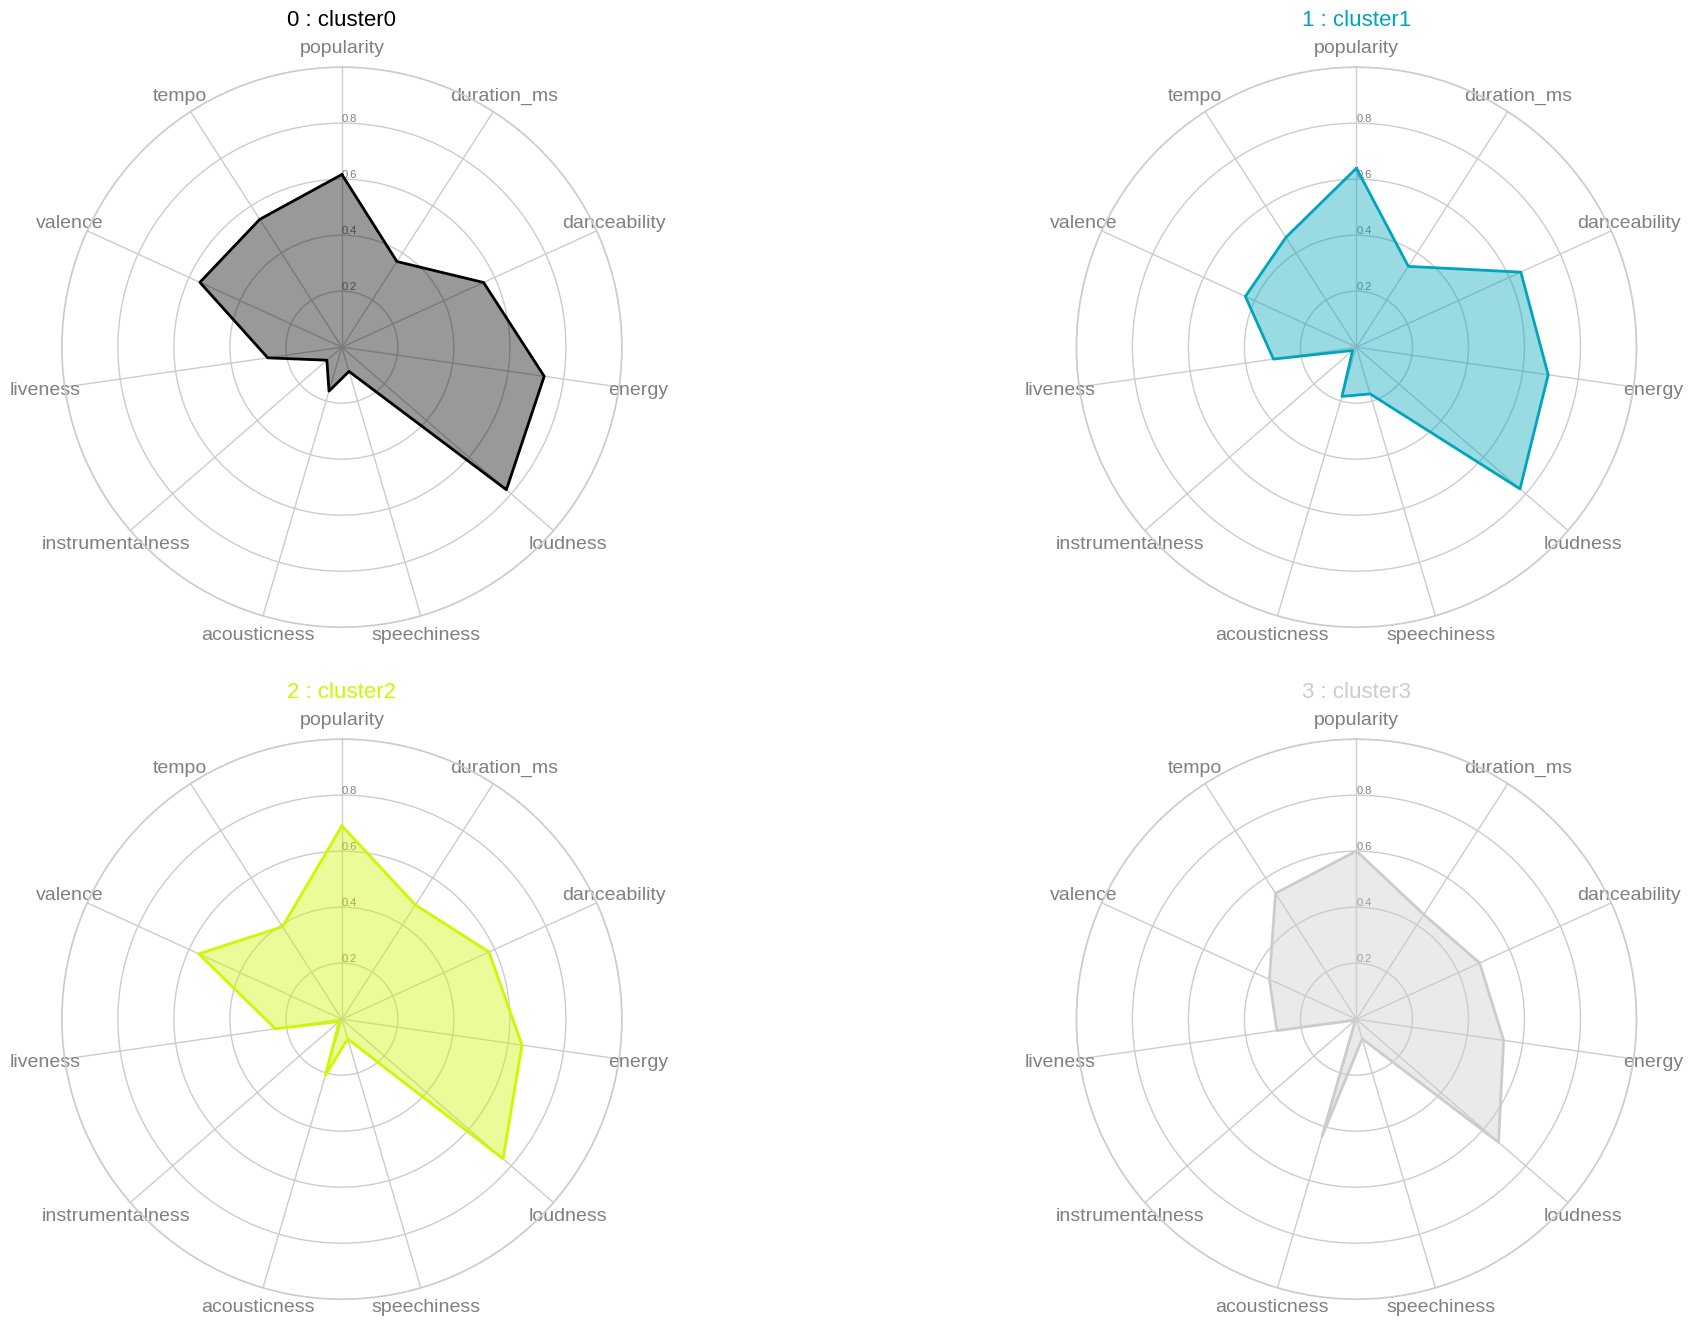

In [ ]:
def make_radar(row, title, color, dframe, num_clusters):
    categories=list(dframe)[1:]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True, )

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=14)

    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(title, size=16, color=color, y=1.06)

p = '#173F5F', '#20639B', '#3CAEA3', '#F6D55C', '#ED553B'
plt.figure(figsize=(24,16))

my_palette = plt.cm.get_cmap('nipy_spectral', len(df_radar_kmean.index))

title_list = ['cluster0', 'cluster1', "cluster2", 'cluster3', 'cluster4']

for row in range(0, len(df_radar_kmean.index)):
    make_radar(row=row, title=str(df_radar_kmean['cluster'][row]) + ' : ' + title_list[row],
               color=my_palette(row), dframe=df_radar_kmean, num_clusters=len(df_radar_kmean.index))

plt.show()

## DBSCAN Clustering

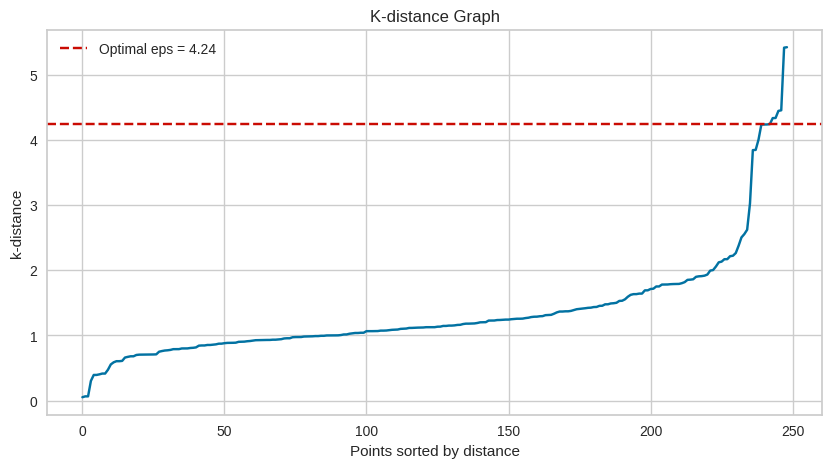

Estimated number of clusters: 4
Estimated number of noise points: 6


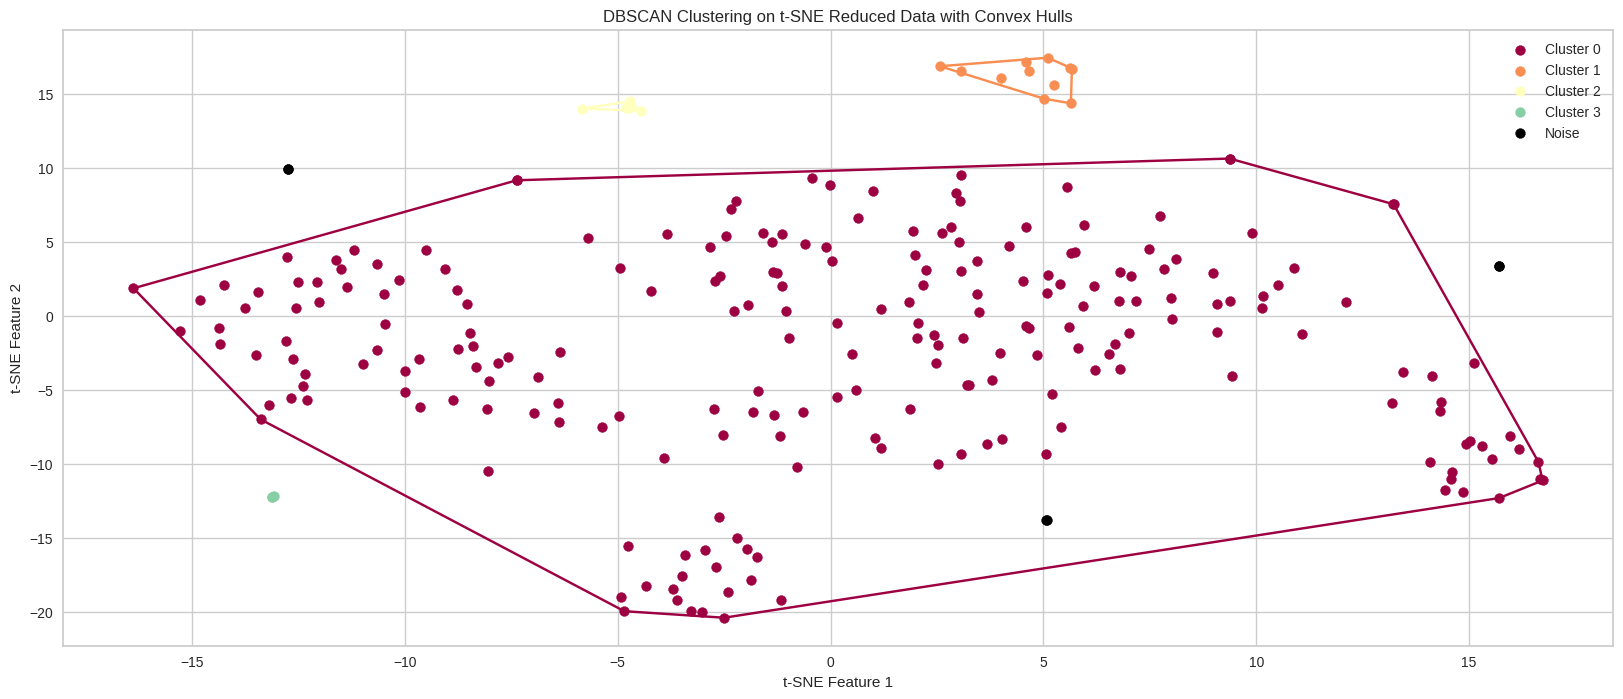

In [ ]:
min_samples = 3

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(tsne_data)
distances, indices = neighbors_fit.kneighbors(tsne_data)

distances = np.sort(distances[:, min_samples - 1])

kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve='convex', direction='increasing')
optimal_eps = distances[kneedle.elbow]

plt.figure(figsize=(10, 5))
plt.plot(range(len(distances)), distances)
plt.axhline(y=optimal_eps, color='r', linestyle='--', label=f'Optimal eps = {optimal_eps:.2f}')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance')
plt.title('K-distance Graph')
plt.legend()
plt.show()

db = DBSCAN(eps=optimal_eps, min_samples=min_samples).fit(tsne_data)
labels = db.labels_
cluster_dbscan = pd.DataFrame(labels, columns=['cluster'])

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

plt.figure(figsize=(20, 8))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = tsne_data[class_member_mask]

    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f'Cluster {k}' if k != -1 else 'Noise')

    if k != -1:
        # Draw convex hull for each cluster
        hull = ConvexHull(xy)
        for simplex in hull.simplices:
            plt.plot(xy[simplex, 0], xy[simplex, 1], color=tuple(col))

plt.title('DBSCAN Clustering on t-SNE Reduced Data with Convex Hulls')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()


In [ ]:
df1 = df.copy()
df_DBSCAN = df1.drop(columns=["artists","release_date","name", "mode", "time_signature", "genres"])

df_DBSCAN = pd.concat([df_DBSCAN, cluster_dbscan], axis=1)


In [ ]:
df_DBSCAN

,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,100,175459,1,0.701,0.760,0,-5.478,0.0285,0.10700,0.000065,0.1850,0.690,103.969,0
1,99,155151,0,0.849,0.699,1,-5.106,0.0436,0.09820,0.000215,0.0680,0.927,138.003,0
2,96,179586,0,0.893,0.400,11,-7.981,0.0643,0.04520,0.082300,0.0632,0.945,124.987,0
3,90,251424,0,0.741,0.620,10,-5.505,0.0412,0.02950,0.000809,0.0398,0.934,117.038,1
4,95,228965,0,0.504,0.386,11,-10.976,0.0308,0.50200,0.000015,0.0961,0.281,192.004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,78,143901,1,0.737,0.846,1,-4.510,0.2200,0.00614,0.000000,0.0486,0.546,87.981,0
245,38,159439,1,0.582,0.674,5,-3.445,0.0330,0.37400,0.000000,0.2290,0.221,128.072,3
246,20,178147,1,0.556,0.661,6,-5.052,0.2040,0.30000,0.000000,0.1010,0.668,168.560,0
247,0,207853,0,0.788,0.859,2,-2.724,0.0856,0.28100,0.000000,0.0424,0.822,141.020,0


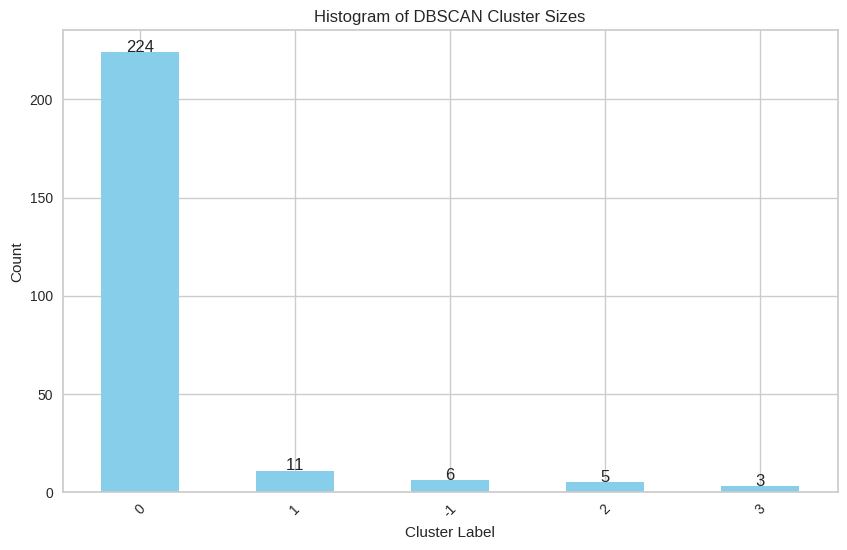

In [ ]:
cluster_counts = df_DBSCAN['cluster'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of DBSCAN Cluster Sizes')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(cluster_counts):
    plt.text(i, count + 0.2, str(count), ha='center')

plt.show()


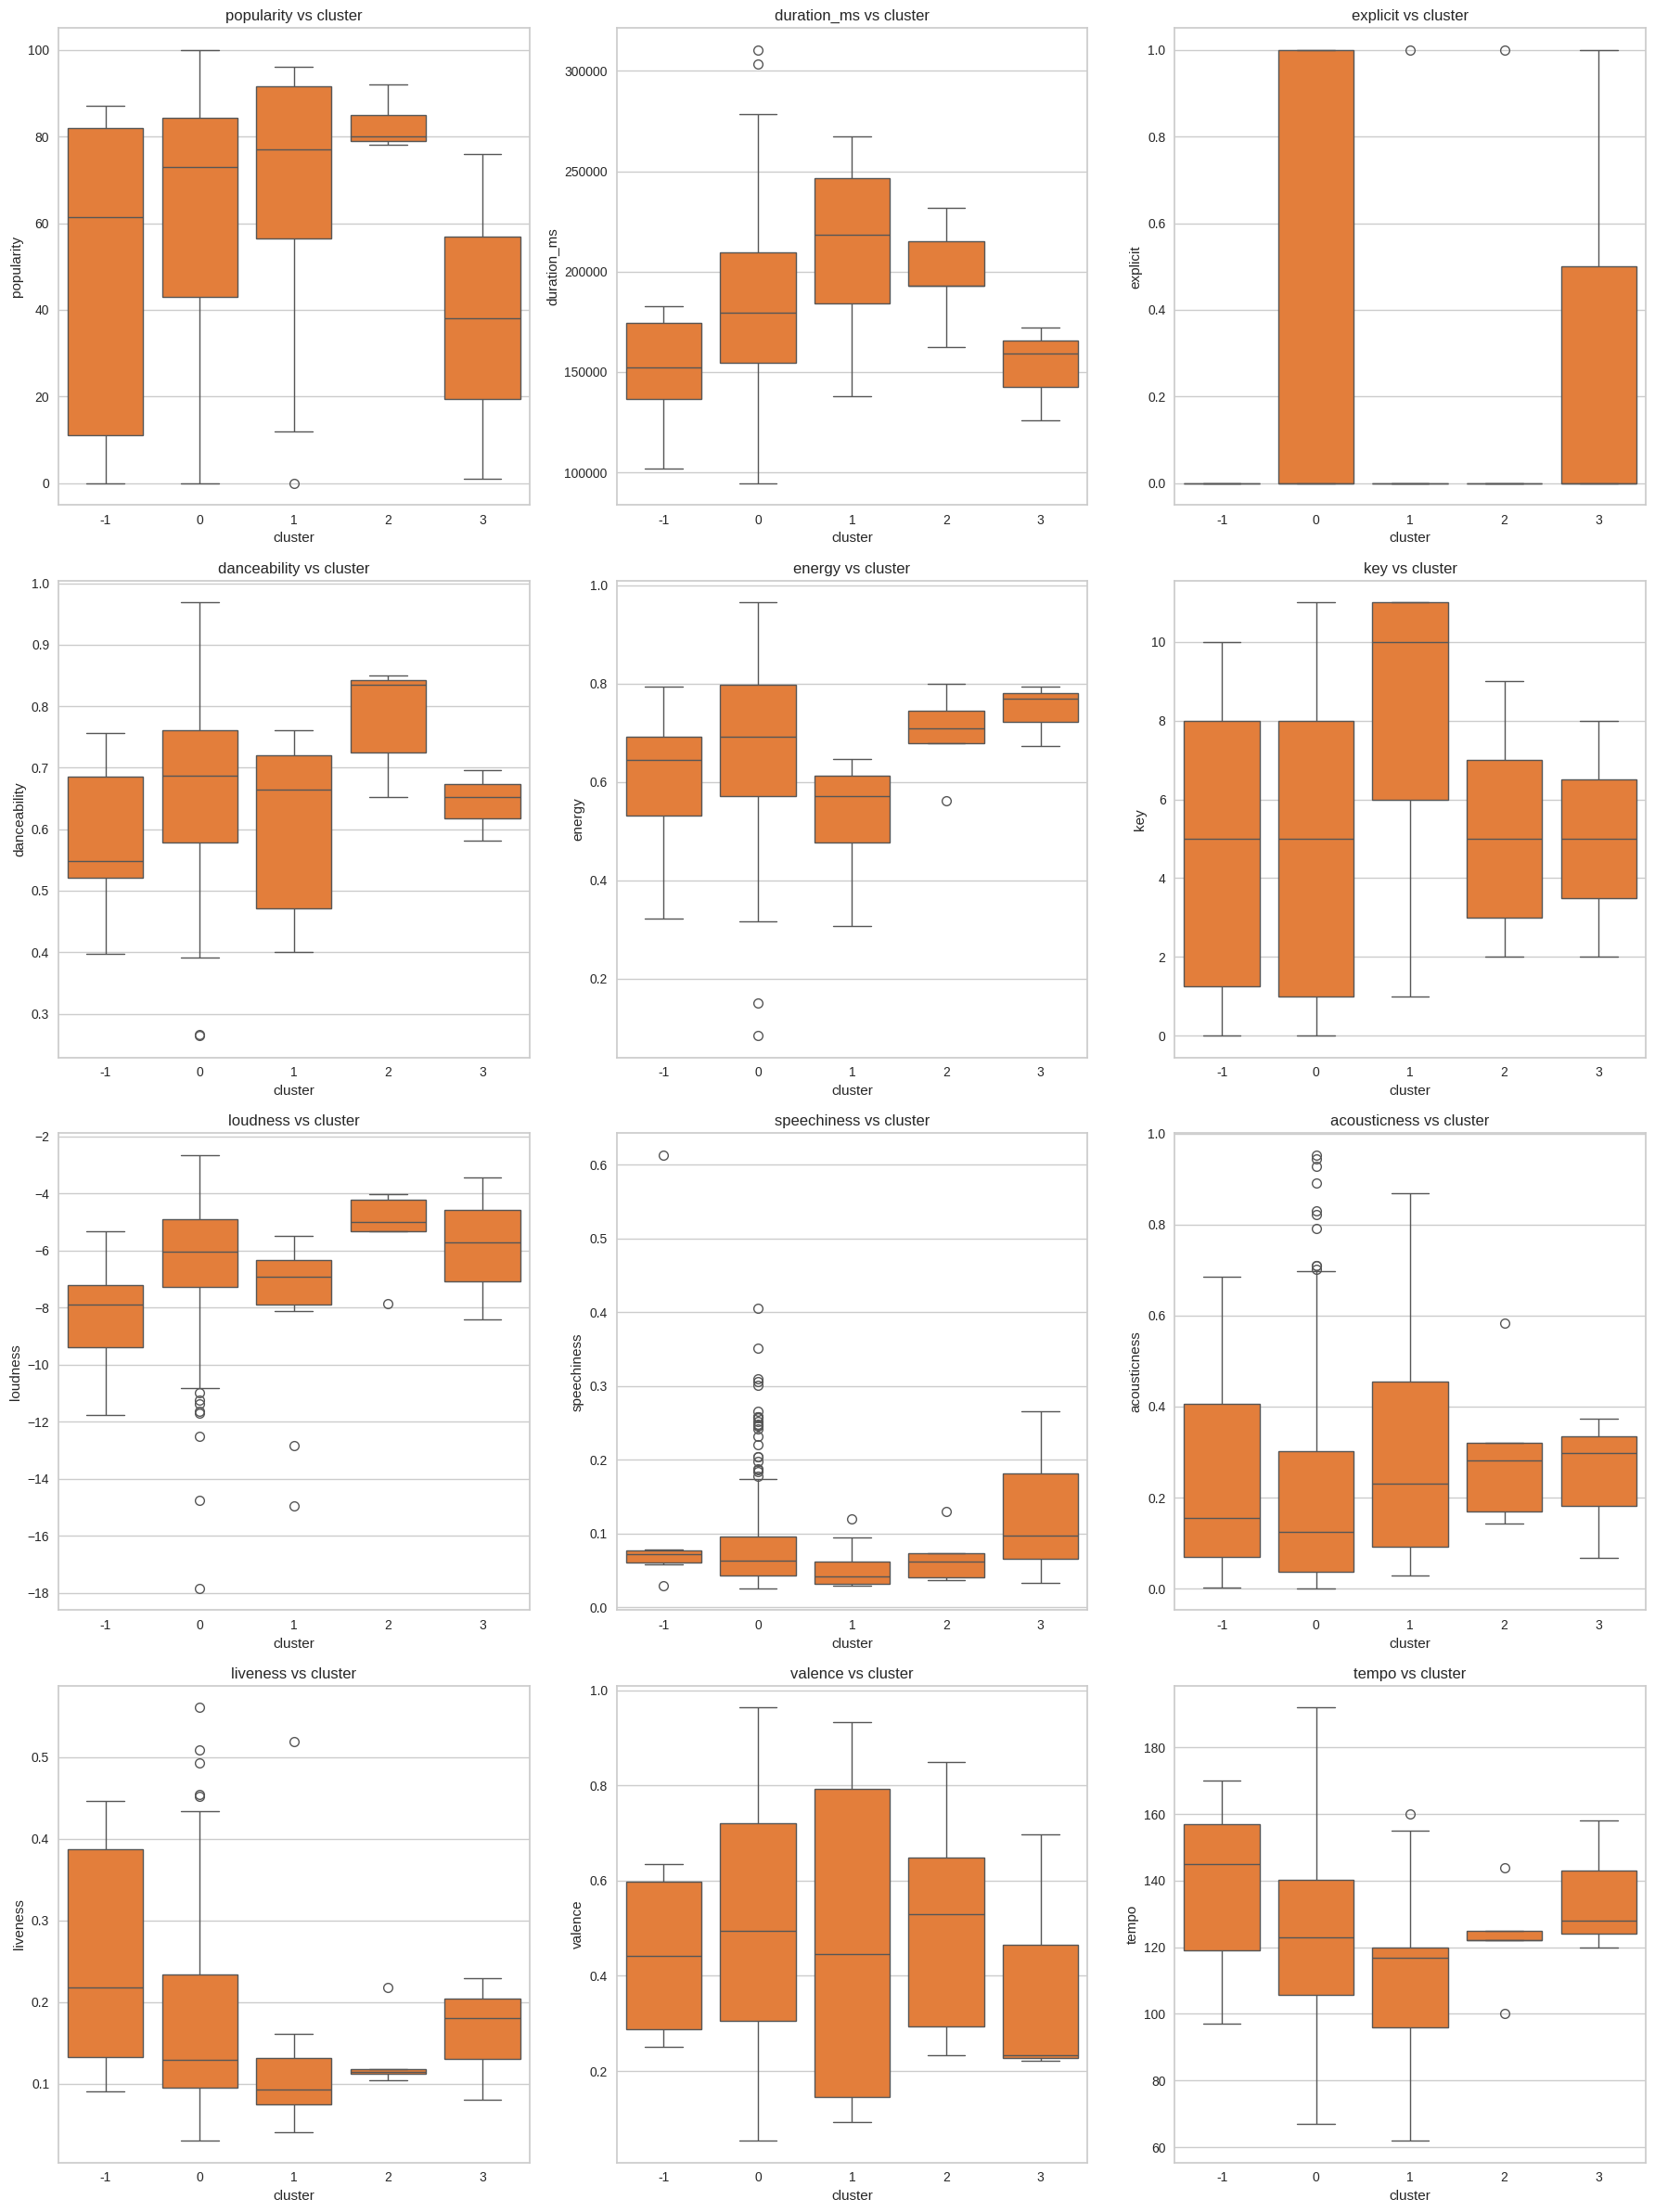

In [ ]:
numerical_features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
                      'key', 'loudness', 'speechiness', 'acousticness',  'liveness', 'valence', 'tempo']
num_features = len(numerical_features)
rows = (num_features + 2) // 3

fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))

axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    sns.boxplot(x='cluster', y=feature, data=df_DBSCAN, ax=axes[idx], color='#FF781F')
    axes[idx].set_title(f'{feature} vs cluster')

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


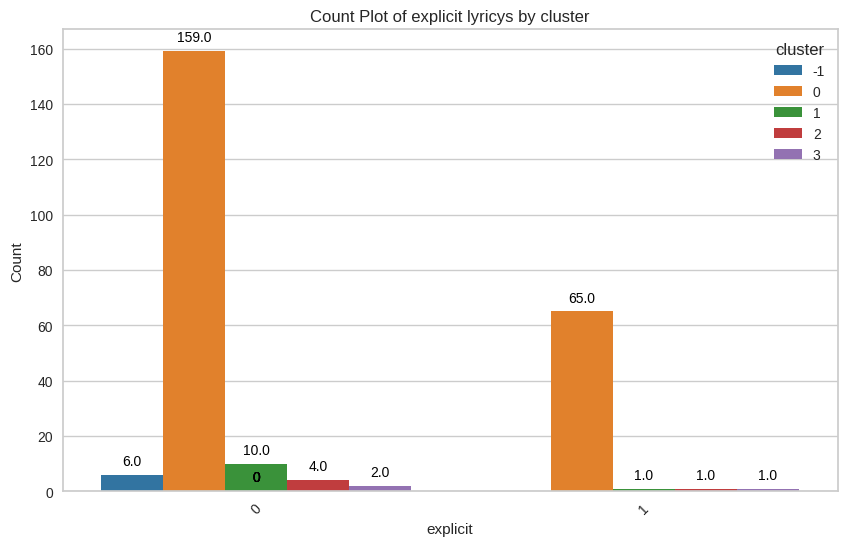

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_DBSCAN, x="explicit", hue="cluster", palette="tab10")
plt.title(f'Count Plot of explicit lyricys by cluster')
plt.xlabel("explicit")
plt.ylabel('Count')
plt.legend(title="cluster", loc='upper right')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

In [ ]:
df_radar = df
df_radar = df_radar.drop(columns=["artists","release_date","name", "explicit", "key", "mode", "time_signature", "genres"])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_radar)
df_radar = pd.DataFrame(scaled_data, columns=df_radar.columns)


df_radar_dbscan = pd.concat([df_radar, cluster_dbscan['cluster']], axis=1)
df_radar_dbscan = df_radar_dbscan.groupby('cluster').mean().reset_index()
df_radar_dbscan

,cluster,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1,0.488333,0.259061,0.451537,0.587022,0.628604,0.218289,0.267388,0.001728,0.420760,0.427609,0.585424
1,0,0.642188,0.404734,0.574740,0.671883,0.760345,0.100813,0.219237,0.030460,0.272048,0.498446,0.481945
2,1,0.667273,0.550323,0.476725,0.507378,0.641014,0.047574,0.333154,0.014530,0.195695,0.464726,0.385369
3,2,0.828000,0.483770,0.733050,0.698070,0.826280,0.072192,0.313739,0.143167,0.194805,0.502635,0.466779
4,3,0.383333,0.268836,0.538061,0.750662,0.788435,0.180849,0.258125,0.000069,0.250831,0.363563,0.564962


<ipython-input-42-a12e1b7cb274>:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



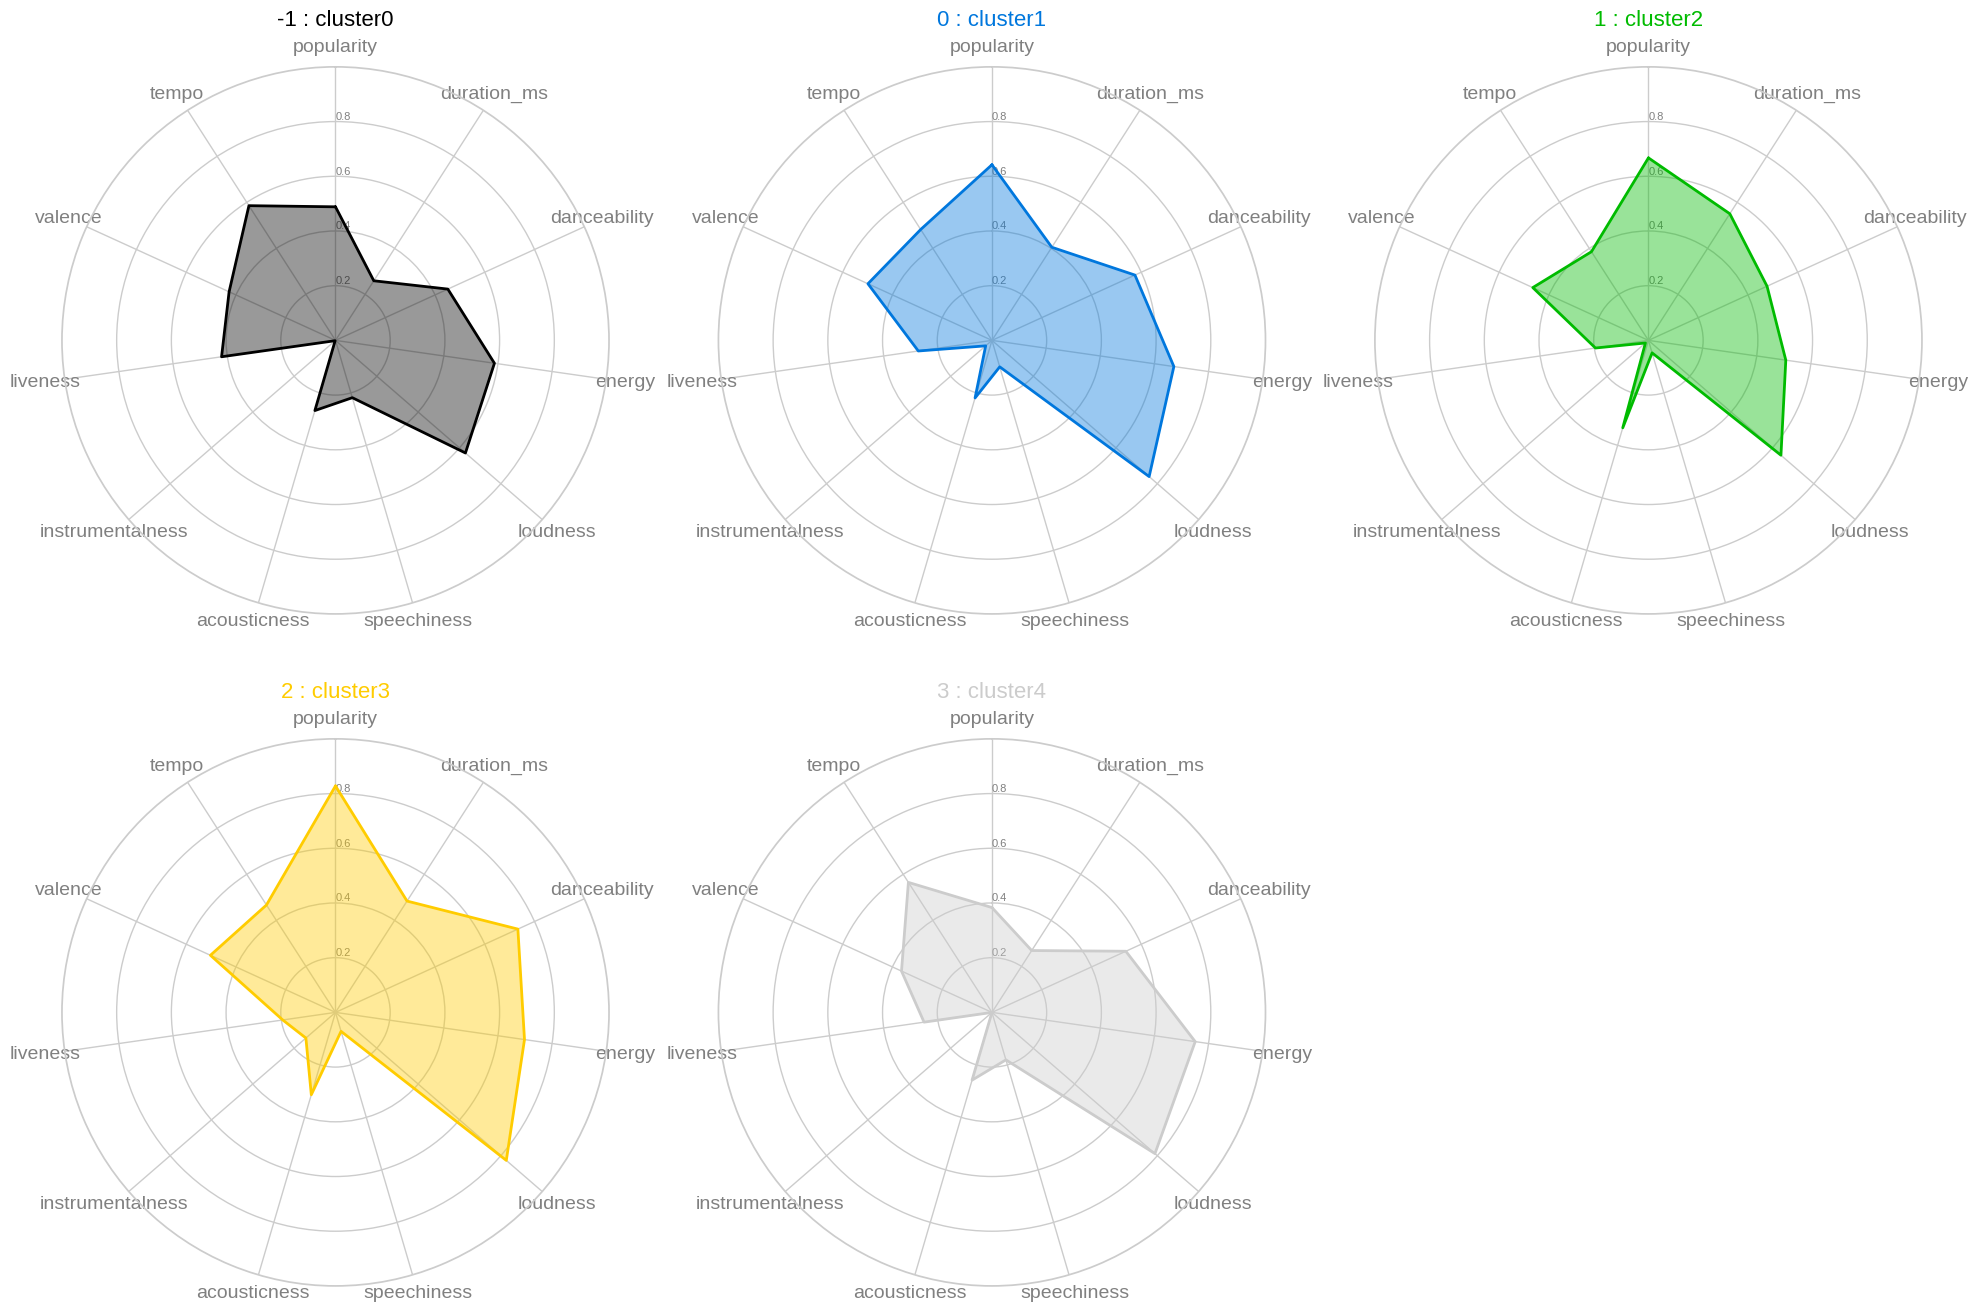

In [ ]:
p = '#173F5F', '#20639B', '#3CAEA3', '#F6D55C', '#ED553B'
plt.figure(figsize=(24,16))

my_palette = plt.cm.get_cmap('nipy_spectral', len(df_radar_dbscan.index))

title_list = ['cluster0', 'cluster1', "cluster2", 'cluster3', 'cluster4']

for row in range(0, len(df_radar_dbscan.index)):
    make_radar(row=row, title=str(df_radar_dbscan['cluster'][row]) + ' : ' + title_list[row],
               color=my_palette(row), dframe=df_radar_dbscan, num_clusters=len(df_radar_dbscan.index))


plt.show()